In [1]:
%matplotlib inline

In [2]:
import hcipy as hci
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.rcParams['image.origin'] = True

In [10]:
TP = 4
if TP == 1:                                                      # Ex Fraun HCIPy, F = 1
    diam_aperture = 1                             
    wvlgth = 1                                           
    focal_length = 1  
elif TP == 2:                                                    # Ex Fresnel HCIPy, F = 101
    diam_aperture = 0.01     
    wvlgth = 660e-9             
    focal_length = 1.5 
elif TP == 4:                                                    # AuxTel ?, F = 100100/0.00001
    diam_aperture = 1.2 #marche avec 0.0012.... F too big ? 
    wvlgth = 666e-9             
    focal_length = 0.00001*18*diam_aperture 
    
elif TP == 5:                                                    # Page wiki, F = 0.95
    diam_aperture = 11e-6      
    wvlgth = 10e-9             
    focal_length = 0.0127  
elif TP == 6:                                                    # Page wiki, F ~ 0.01
    diam_aperture = 11e-7      
    wvlgth = 10e-9             
    focal_length = 0.0127  
    
print('Fresnel number = {}'.format(diam_aperture**2/(wvlgth*focal_length)))

Fresnel number = 10010010010.01001


In [4]:
grid_size_pix = 1024
grid_diam = 2*diam_aperture                                 # Higher -> better fresnel images: WHY ???

pupil_grid = hci.make_pupil_grid(grid_size_pix, grid_diam)

central_obs_ratio = 0.35/1.2                                 # ratio diameter obscuration / pupil diameter
spid_width = 0.01                                            # [m]
nb_spid = 4                                                  # [m]


Fresnel number = 10010010010.01001


## **Aperture Auxtel (spiders + central obscuration)**

In [5]:
central_obs = hci.aperture.make_obstructed_circular_aperture(diam_aperture, central_obs_ratio)
spider_1 = hci.aperture.make_spider([0,0], [0.6,0.6], spid_width)         # [m][m]
spider_2 = hci.aperture.make_spider([0,0], [0.6,-0.6], spid_width)        # [m][m]
spider_3 = hci.aperture.make_spider([0,0], [-0.6,0.6], spid_width)        # [m][m]
spider_4 = hci.aperture.make_spider([0,0], [-0.6,-0.6], spid_width)       # [m][m]

tel_pupil = central_obs(pupil_grid)*spider_1(pupil_grid)*spider_2(pupil_grid)*spider_3(pupil_grid)*spider_4(pupil_grid)
wf = hci.Wavefront(tel_pupil, wvlgth)

## **Comparative plots**

/home/novae/rey/anaconda3/lib/python3.7/site-packages/hcipy/fourier/fast_fourier_transform.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[self.cutout_input] = (field.ravel() * self.weights * self.shift_output).reshape(self.shape_in)
/home/novae/rey/anaconda3/lib/python3.7/site-packages/hcipy/fourier/fast_fourier_transform.py:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = res[self.cutout_output].ravel() * self.shift_input
/home/novae/rey/anaconda3/lib/python3.7/site-packages/hcipy/fourier/fast_fourier_transform.py:81: Futu

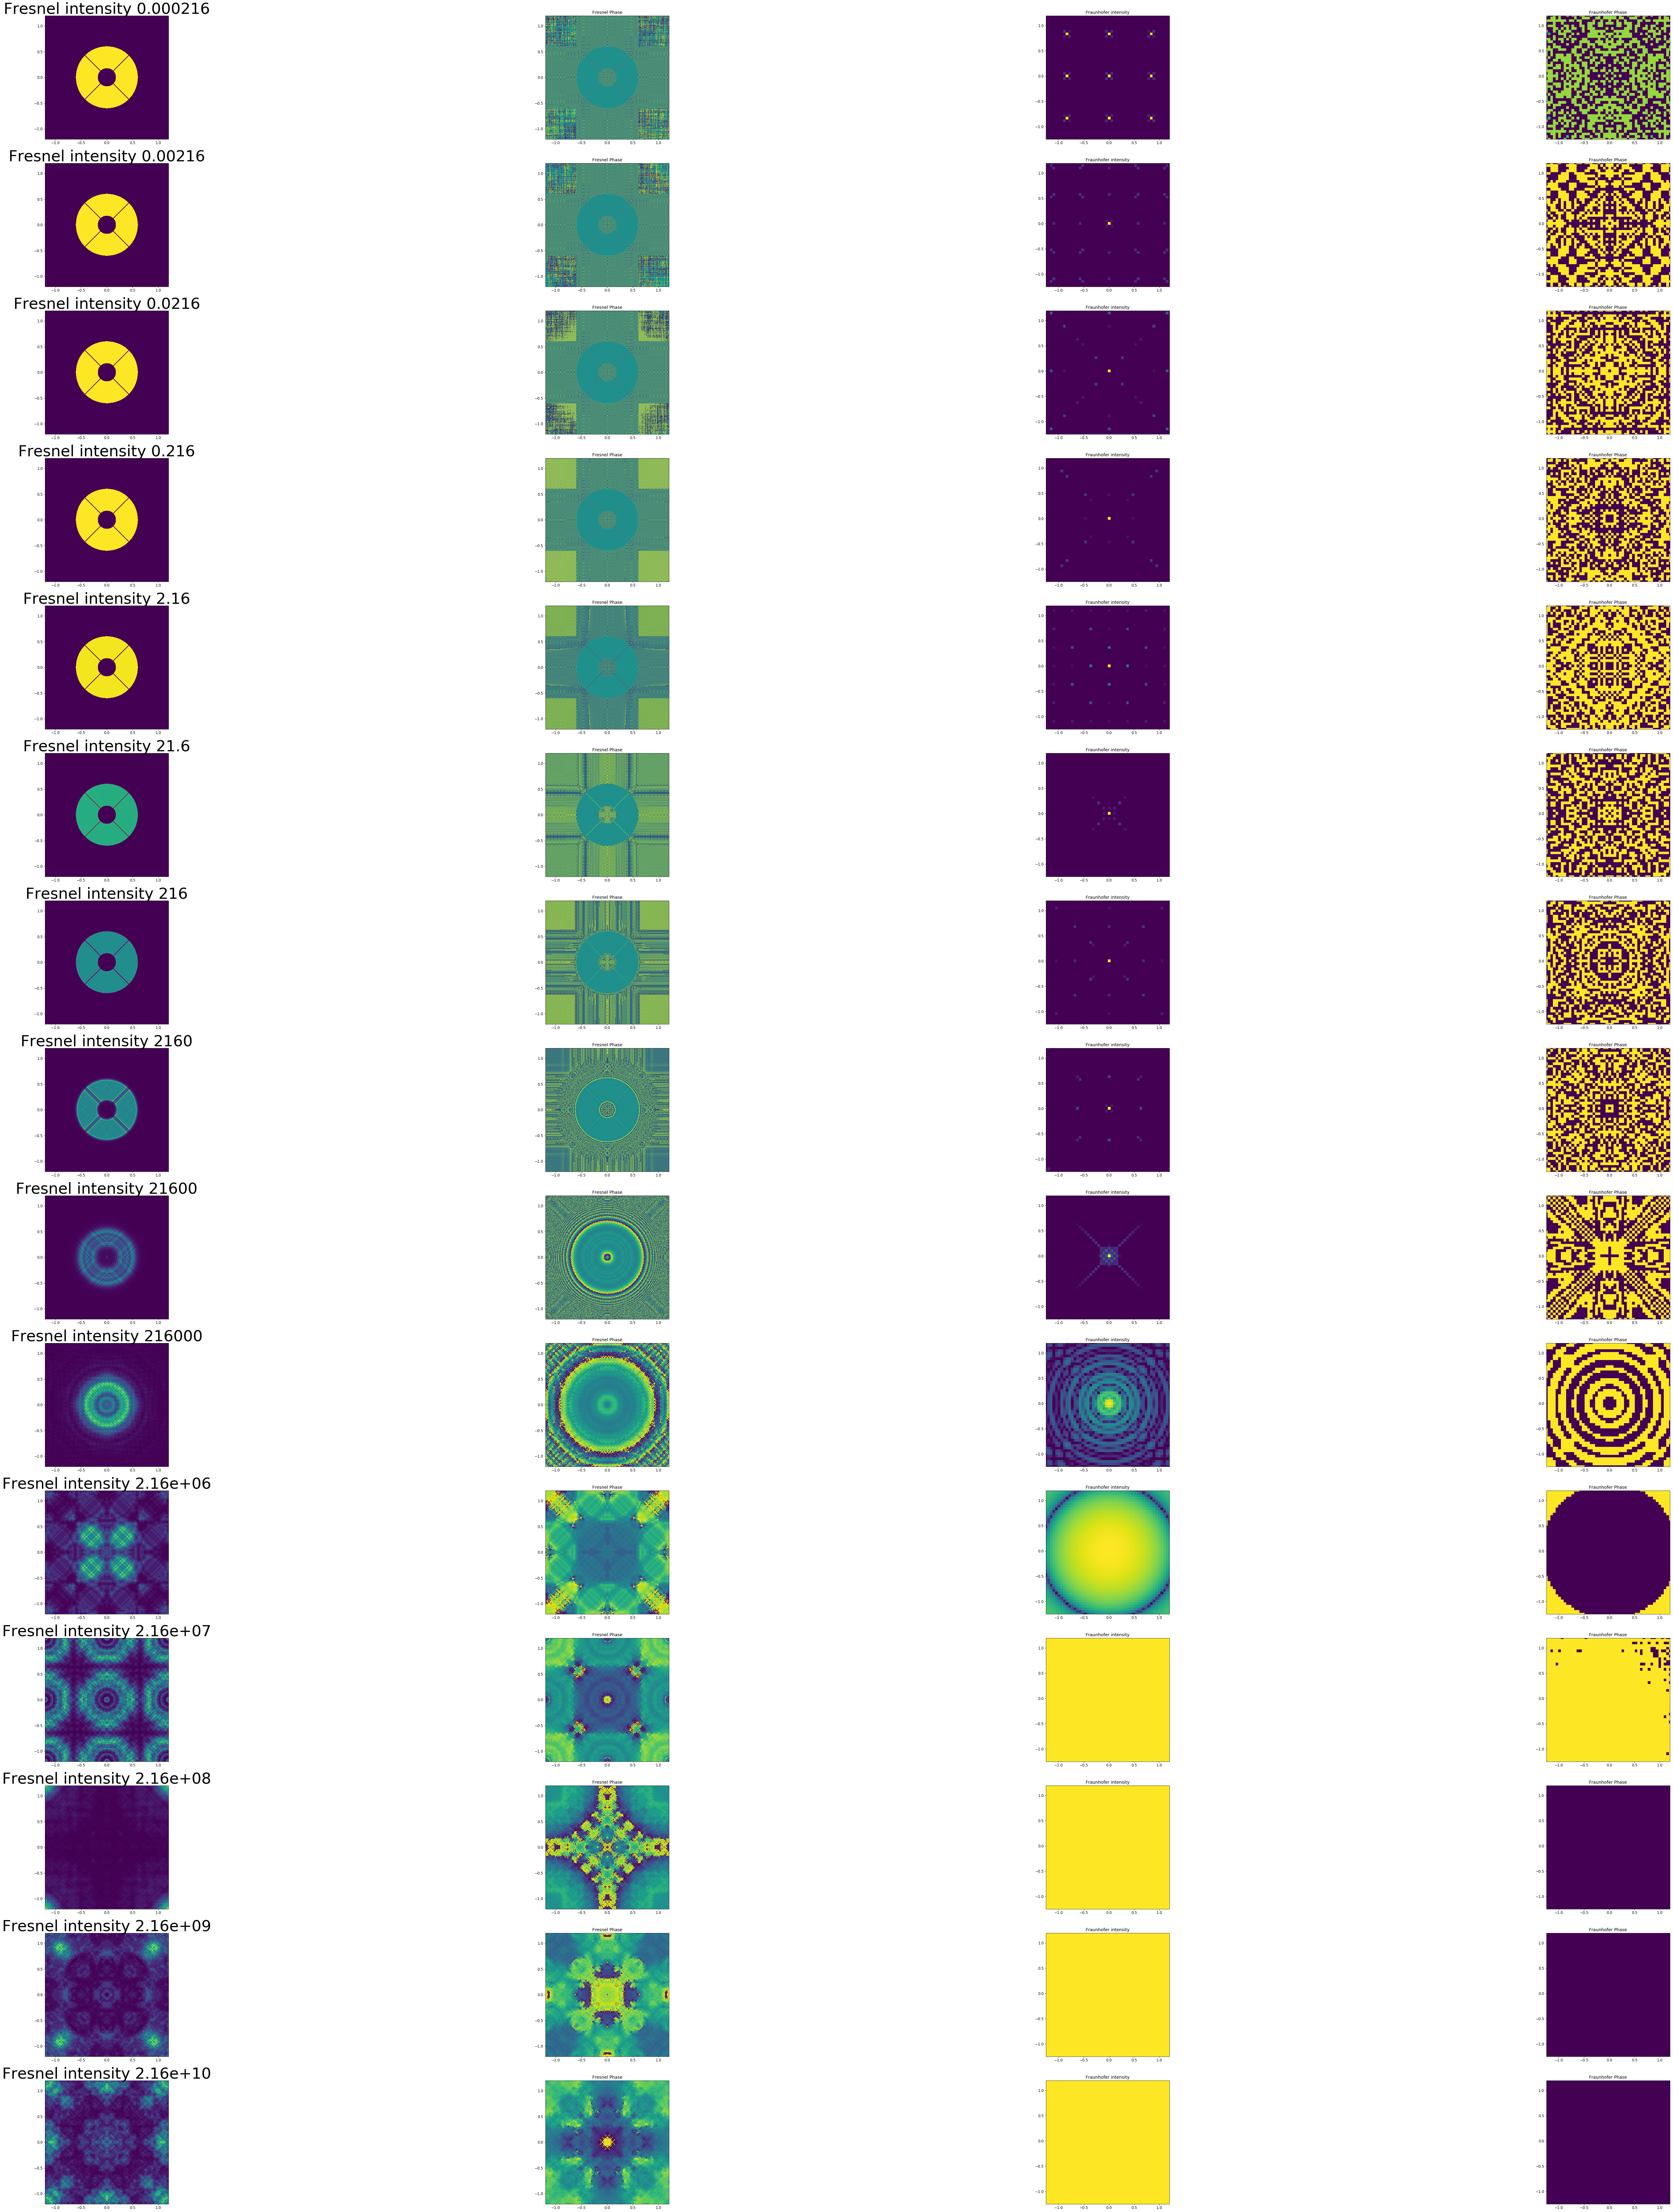

In [6]:
sampl_focal = 8
fov = 3 #16

focal_grid = hci.make_focal_grid(pupil_grid, sampl_focal, fov)
    
nbit = 15
nbsub = 4
for i in range (nbit):
    
    prop = hci.FraunhoferPropagator(pupil_grid, focal_grid, wvlgth, (10**i)*focal_length)
    focal_image = prop.forward(wf)
    
    fresnel_prop = hci.FresnelPropagator(pupil_grid, (10**i)*focal_length)
    img_2 = fresnel_prop(wf)
    
    plt.subplot(nbit, nbsub, 1+nbsub*i)
    hci.imshow_field(img_2.intensity, vmin=0)
    plt.title('Fresnel intensity {x:g}'.format(x=(10**i)*focal_length), fontsize=50)

    plt.subplot(nbit, nbsub, 2+nbsub*i)
    hci.imshow_field(img_2.phase)
    plt.title('Fresnel Phase')

    plt.subplot(nbit, nbsub, 3+nbsub*i)
    hci.imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
    plt.title('Fraunhofer intensity')

    plt.subplot(nbit, nbsub, 4+nbsub*i)
    hci.imshow_field(focal_image.phase)
    plt.title('Fraunhofer Phase')

plt.tight_layout()
plt.show()